1. What is Unsupervised Learning in the Context of Machine Learning?
Unsupervised learning is a type of machine learning where the model is trained on unlabeled data. It tries to find hidden patterns or intrinsic structures in the input data without any prior knowledge of the output labels.
Examples: Clustering (e.g., K-Means), Dimensionality Reduction (e.g., PCA), Association Rule Mining.

2. How Does the K-Means Clustering Algorithm Work?
K-Means clustering aims to partition the dataset into K clusters where each data point belongs to the cluster with the nearest mean.
Steps:

Initialize K cluster centroids randomly.

Assign each data point to the nearest centroid.

Recalculate centroids as the mean of assigned points.

Repeat steps 2–3 until centroids stop changing significantly.

3. Explain the Concept of a Dendrogram in Hierarchical Clustering
A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering.

In agglomerative clustering, it starts with each data point as a separate cluster and merges the closest ones iteratively.

The dendrogram helps visualize how clusters are combined and allows us to decide the optimal number of clusters by "cutting" the tree at a specific height.

4. What is the Main Difference Between K-Means and Hierarchical Clustering?
K-Means: A partitional algorithm; requires the number of clusters (K) in advance; may converge to local minima.

Hierarchical Clustering: A hierarchical method; builds a tree of clusters; does not require pre-specifying the number of clusters and can be visualized with a dendrogram.

5. What Are the Advantages of DBSCAN Over K-Means?
Doesn't require specifying number of clusters in advance.

Can find clusters of arbitrary shapes, unlike K-Means which assumes spherical clusters.

Handles noise and outliers better by classifying them as noise.

Suitable for datasets with varying densities.

6. When Would You Use Silhouette Score in Clustering?
The Silhouette Score is used to evaluate the quality of clustering. It measures how similar a data point is to its own cluster compared to other clusters.

It ranges from -1 to 1, where higher values indicate better clustering.

Use it to:

Compare different clustering models

Choose the optimal number of clusters (K) in algorithms like K-Means

7. What Are the Limitations of Hierarchical Clustering?
Computationally expensive for large datasets (time complexity is O(n²))

No backtracking: once merged or split, clusters cannot be undone

Sensitive to noise and outliers

Choice of linkage (e.g., single, complete, average) can greatly affect results

8. Why Is Feature Scaling Important in Clustering Algorithms Like K-Means?
K-Means uses Euclidean distance to measure similarity, so:

Features with larger ranges can dominate the distance calculations.

Unscaled features may lead to biased clustering.

Use standardization or normalization to bring all features to a similar scale before applying K-Means.

9. How Does DBSCAN Identify Noise Points?
DBSCAN labels a point as noise (or outlier) if:

It doesn't have enough neighboring points (less than minPts) within a radius eps.

Such points do not belong to any cluster and are treated as isolated points.

10. Define Inertia in the Context of K-Means
Inertia is the sum of squared distances between each point and the centroid of its assigned cluster.

It indicates how tightly the data points are clustered.

Lower inertia means better clustering (but beware of overfitting by increasing K too much).

11. What is the Elbow Method in K-Means Clustering?
The Elbow Method is used to determine the optimal number of clusters (K) in K-Means.

Plot inertia (within-cluster sum of squares) against various values of K.

The "elbow point" (where the decrease in inertia slows down sharply) suggests the best value of K — a trade-off between compactness and simplicity.

12. Describe the Concept of "Density" in DBSCAN
In DBSCAN, density refers to how closely data points are packed in an area.

A point is considered core if it has at least minPts points within a distance eps.

Clusters are formed by dense regions, and points not part of any dense region are treated as noise.

13. Can Hierarchical Clustering Be Used on Categorical Data?
Yes, but with limitations.

You need a suitable distance metric like Hamming distance or Gower’s distance (which can handle mixed types).

Traditional hierarchical clustering methods are best suited for numerical data, so categorical data often requires preprocessing or specialized approaches.

14. What Does a Negative Silhouette Score Indicate?
A negative Silhouette Score means that:

The data point is closer to a neighboring cluster than to its own.

This indicates poor clustering, and the point may be misclassified.

High negative scores suggest that the chosen clustering configuration is likely incorrect.

15. Explain the Term "Linkage Criteria" in Hierarchical Clustering
Linkage criteria determine how the distance between clusters is calculated during the merging process.
Common types:

Single linkage: shortest distance between points in two clusters

Complete linkage: farthest distance between points

Average linkage: average of all pairwise distances

Ward’s method: minimizes variance within clusters
The choice of linkage impacts the shape and structure of the resulting dendrogram.

16. Why Might K-Means Clustering Perform Poorly on Data with Varying Cluster Sizes or Densities?
K-Means assumes:

Clusters are spherical and similar in size/density

Each cluster has a roughly equal number of points

So when clusters have different sizes, densities, or non-spherical shapes, K-Means may:

Misclassify points

Split a large cluster into smaller ones

Merge nearby but distinct clusters
It fails to capture the true structure of such data.

17. What Are the Core Parameters in DBSCAN, and How Do They Influence Clustering?
DBSCAN has two main parameters:

eps (epsilon): The radius to search for neighboring points

minPts: The minimum number of points required to form a dense region

How they affect clustering:

Smaller eps → smaller neighborhoods, more noise/outliers

Larger eps → more points grouped together, risk of merging distinct clusters

Higher minPts → stricter density requirement
Tuning these is crucial for good clustering.

18. How Does K-Means++ Improve Upon Standard K-Means Initialization?
K-Means++ selects initial centroids in a smarter way:

The first centroid is chosen randomly

Subsequent centroids are chosen probabilistically based on distance from already chosen centroids
This reduces the chances of poor initialization, leading to:

Faster convergence

Better final clustering

Lower likelihood of getting stuck in a local minimum

19. What Is Agglomerative Clustering?
Agglomerative clustering is a bottom-up hierarchical clustering method:

Starts with each data point as its own cluster

At each step, the two closest clusters are merged

Continues until one single cluster or desired number of clusters is formed
Distance between clusters is measured using linkage criteria.

20. What Makes Silhouette Score a Better Metric Than Just Inertia for Model Evaluation?
While inertia measures compactness of clusters, it:

Always decreases as the number of clusters increases

Doesn’t consider separation between clusters

Silhouette Score balances both:

Cohesion (how close points are to their own cluster)

Separation (how far they are from other clusters)
Thus, it provides a more holistic evaluation of clustering quality, especially for comparing different values of K or different algorithms.



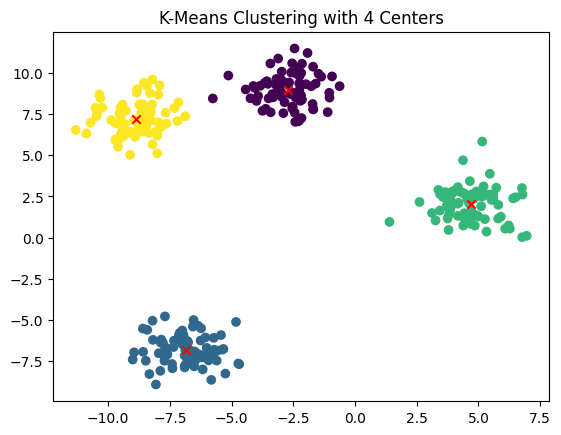

In [1]:
#21
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title("K-Means Clustering with 4 Centers")
plt.show()


In [2]:
#22
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load data
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

# Print first 10 labels
print("First 10 cluster labels:", labels[:10])


First 10 cluster labels: [1 1 1 1 1 1 1 1 1 1]


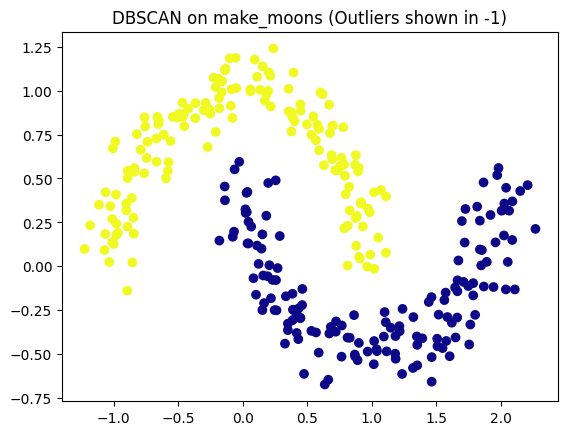

In [3]:
#23
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Generate data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN on make_moons (Outliers shown in -1)")
plt.show()


In [4]:
#24
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Load data
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Print size of each cluster
print("Cluster sizes:", Counter(labels))


Cluster sizes: Counter({np.int32(0): 65, np.int32(2): 62, np.int32(1): 51})


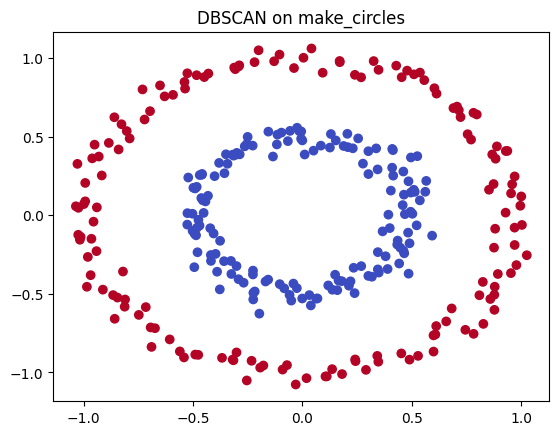

In [5]:
#25
from sklearn.datasets import make_circles

# Generate data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Apply DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("DBSCAN on make_circles")
plt.show()


In [6]:
#26
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load data
data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Output centroids
print("Cluster centroids:\n", kmeans.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


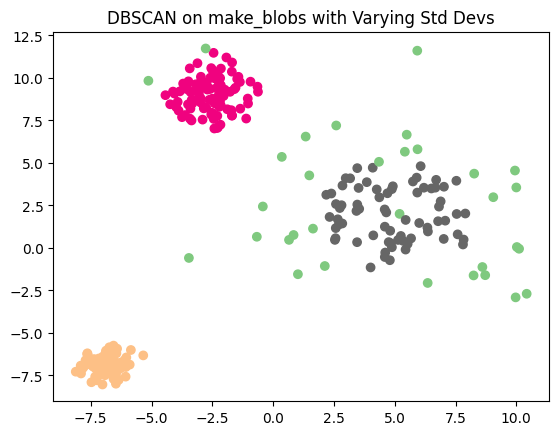

In [7]:
#27
from sklearn.datasets import make_blobs

# Generate blobs with different std deviations
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Apply DBSCAN
db = DBSCAN(eps=0.9, min_samples=5)
labels = db.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("DBSCAN on make_blobs with Varying Std Devs")
plt.show()


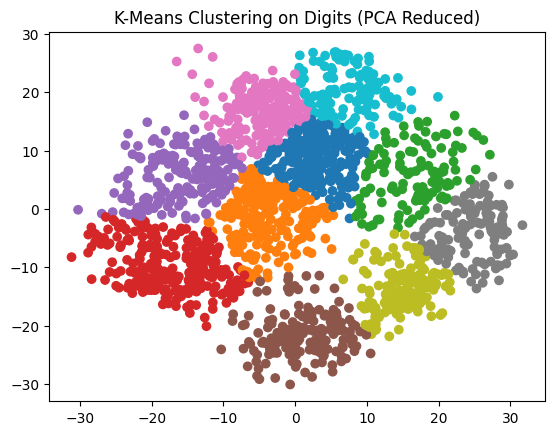

In [8]:
#28
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load digits and apply PCA
digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)

# K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("K-Means Clustering on Digits (PCA Reduced)")
plt.show()


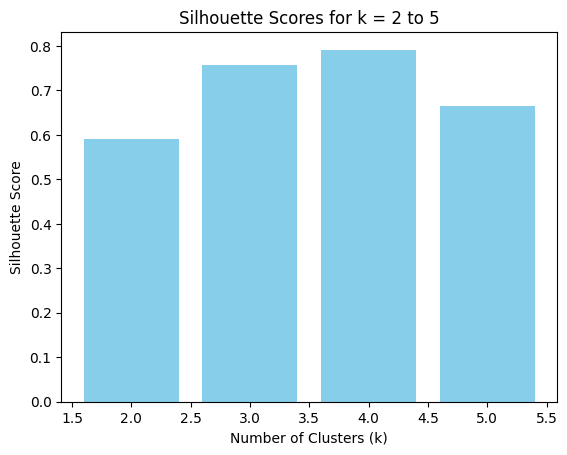

In [9]:
#29
from sklearn.metrics import silhouette_score

# Generate data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Evaluate silhouette scores for k = 2 to 5
scores = []
k_range = range(2, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    scores.append(score)

# Plot
plt.bar(k_range, scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k = 2 to 5')
plt.show()


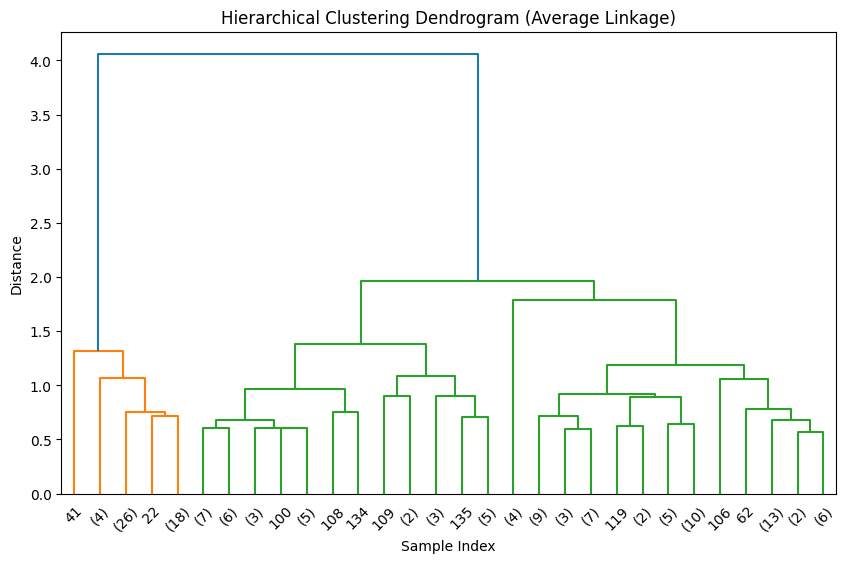

In [10]:
#30
from scipy.cluster.hierarchy import linkage, dendrogram

# Load data
iris = load_iris()
X = iris.data

# Perform linkage
Z = linkage(X, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


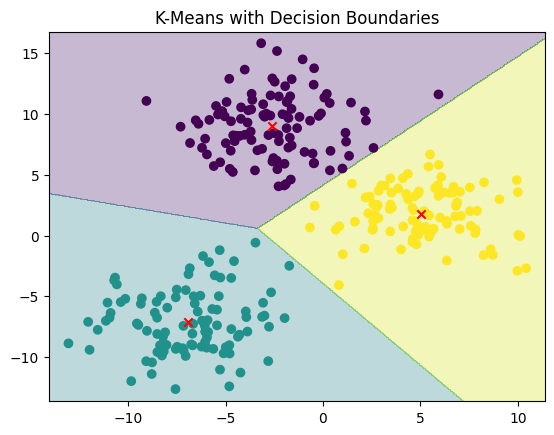

In [11]:
#31
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# Generate overlapping blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.title("K-Means with Decision Boundaries")
plt.show()


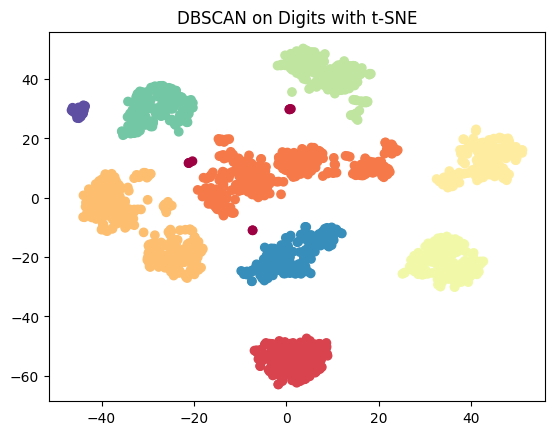

In [12]:
#32
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Load data and reduce with t-SNE
digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

# Apply DBSCAN
db = DBSCAN(eps=5, min_samples=5)
labels = db.fit_predict(X_tsne)

# Plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='Spectral')
plt.title("DBSCAN on Digits with t-SNE")
plt.show()


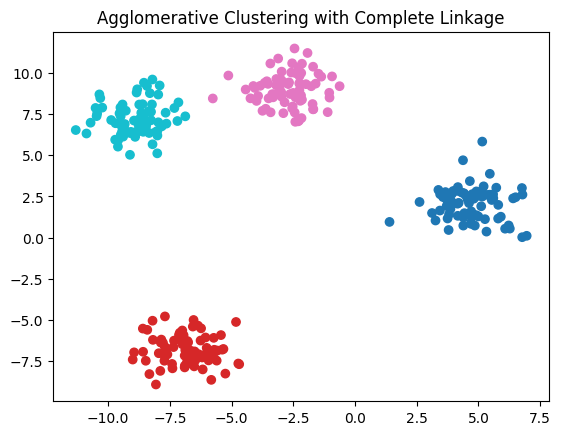

In [13]:
#33
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering with Complete Linkage")
plt.show()


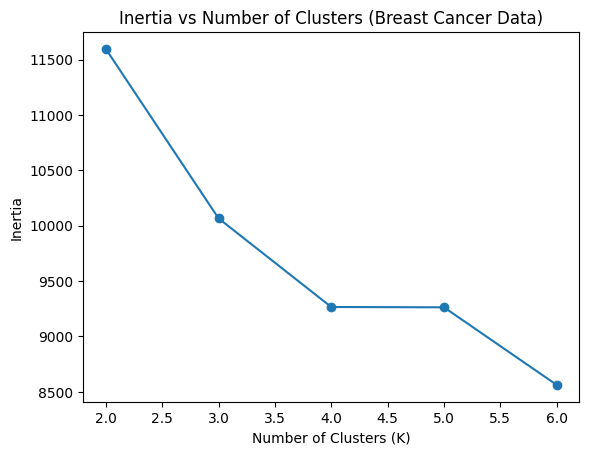

In [14]:
#34
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load and scale data
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

# Compute inertia values
inertias = []
ks = range(2, 7)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot
plt.plot(ks, inertias, marker='o')
plt.title("Inertia vs Number of Clusters (Breast Cancer Data)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


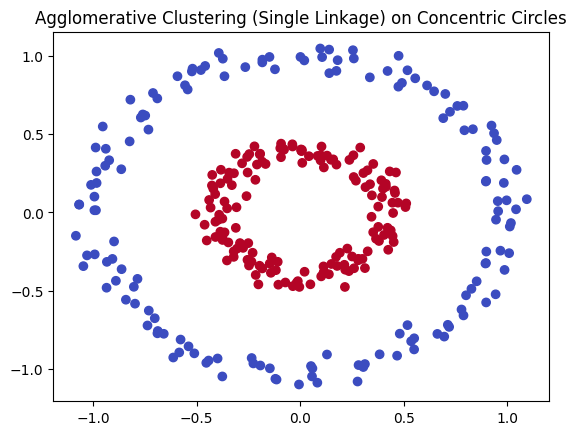

In [15]:
#35
# Generate data
X, _ = make_circles(n_samples=300, factor=0.4, noise=0.05)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.title("Agglomerative Clustering (Single Linkage) on Concentric Circles")
plt.show()


In [16]:
#36
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load and scale
data = load_wine()
X = StandardScaler().fit_transform(data.data)

# Apply DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X)

# Count clusters (excluding noise labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


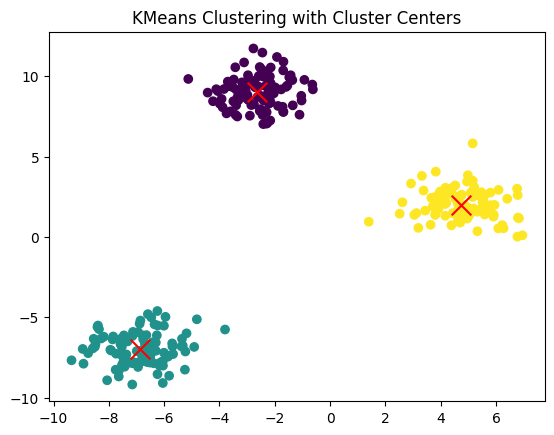

In [17]:
#37
# Generate data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Plot points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=200)
plt.title("KMeans Clustering with Cluster Centers")
plt.show()


In [18]:
#38
# Load data
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)

# Apply DBSCAN
db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(X)

# Count noise samples
noise_count = list(labels).count(-1)
print("Number of noise samples:", noise_count)


Number of noise samples: 26


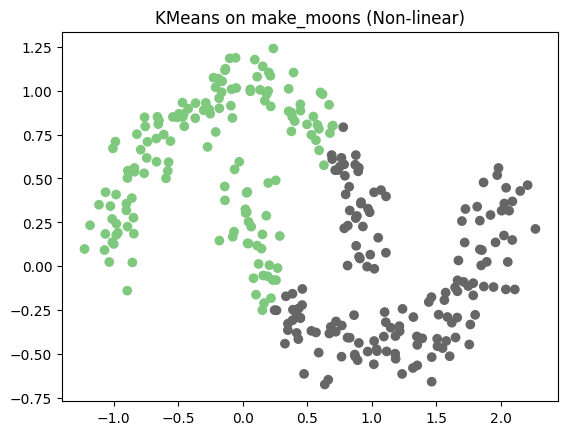

In [19]:
#39
# Generate moons
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("KMeans on make_moons (Non-linear)")
plt.show()


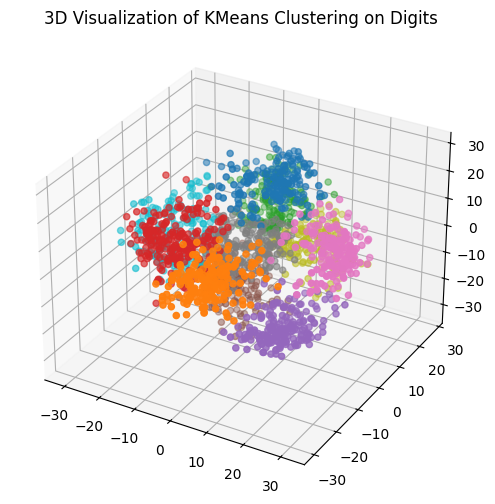

In [20]:
#40
from mpl_toolkits.mplot3d import Axes3D

# Load and reduce
digits = load_digits()
X_pca = PCA(n_components=3).fit_transform(digits.data)

# Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10')
ax.set_title("3D Visualization of KMeans Clustering on Digits")
plt.show()


In [21]:
#41
from sklearn.metrics import silhouette_score

# Generate data
X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Evaluate silhouette score
score = silhouette_score(X, labels)
print("Silhouette Score for 5 clusters:", score)


Silhouette Score for 5 clusters: 0.678738720085253


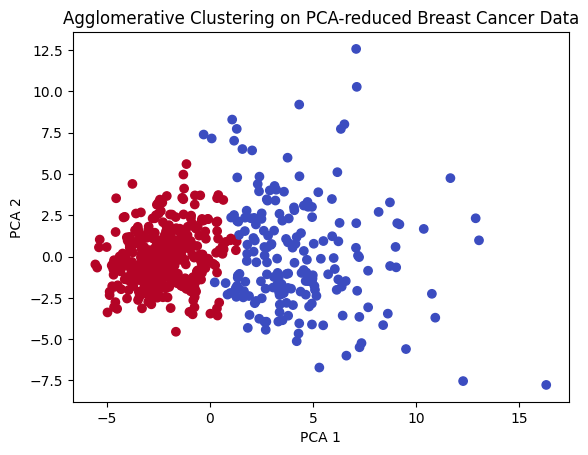

In [22]:
#42
# Load and reduce
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
X_pca = PCA(n_components=2).fit_transform(X)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm')
plt.title("Agglomerative Clustering on PCA-reduced Breast Cancer Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


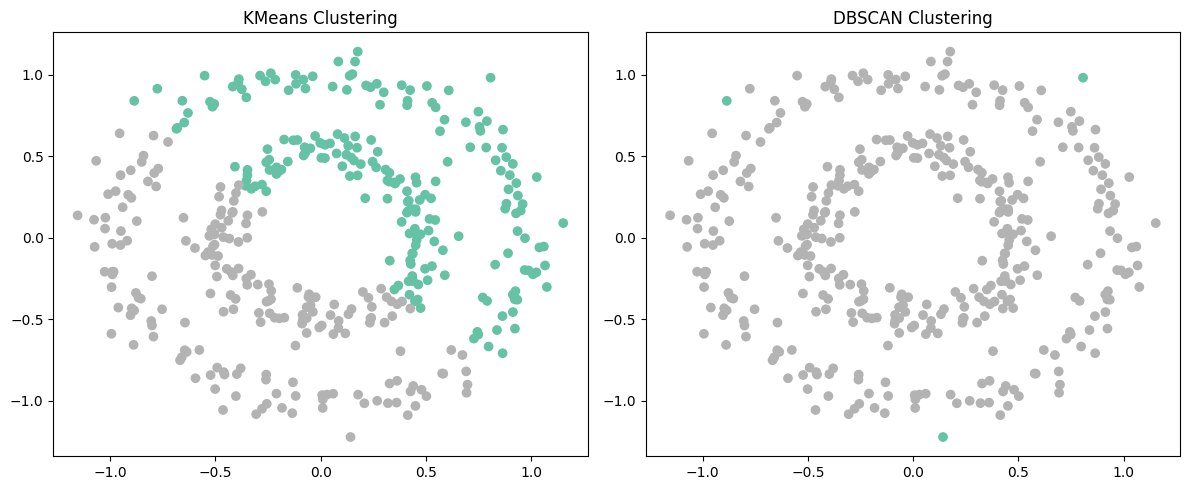

In [23]:
#43
# Generate data
X, _ = make_circles(n_samples=400, factor=0.5, noise=0.08)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
kmeans_labels = kmeans.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)
dbscan_labels = dbscan.labels_

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='Set2')
axes[0].set_title("KMeans Clustering")
axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='Set2')
axes[1].set_title("DBSCAN Clustering")
plt.tight_layout()
plt.show()


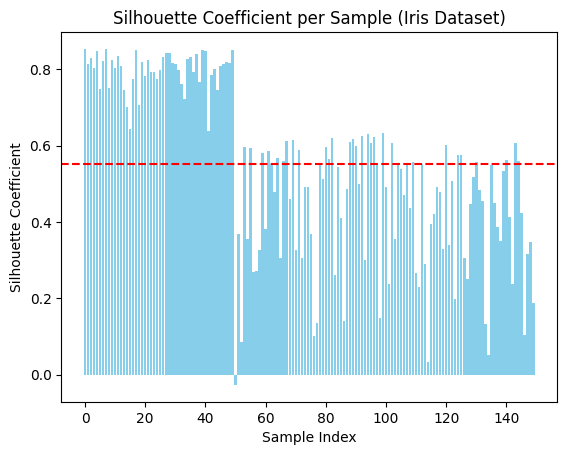

In [24]:
#44
from sklearn.metrics import silhouette_samples

# Load and cluster
X = load_iris().data
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_

# Silhouette coefficients
sil_samples = silhouette_samples(X, labels)

# Plot
plt.bar(range(len(sil_samples)), sil_samples, color='skyblue')
plt.axhline(y=silhouette_score(X, labels), color='red', linestyle='--')
plt.title("Silhouette Coefficient per Sample (Iris Dataset)")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.show()


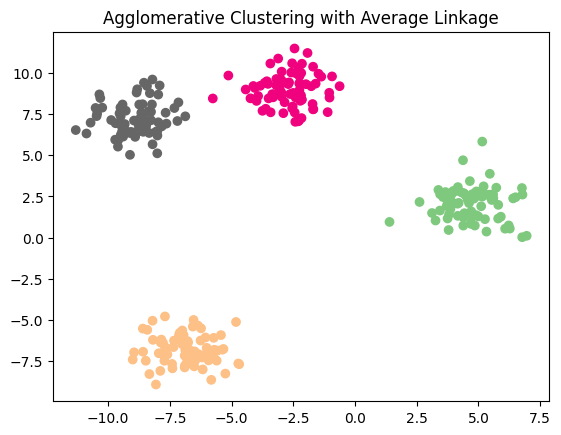

In [25]:
#45
# Generate data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("Agglomerative Clustering with Average Linkage")
plt.show()


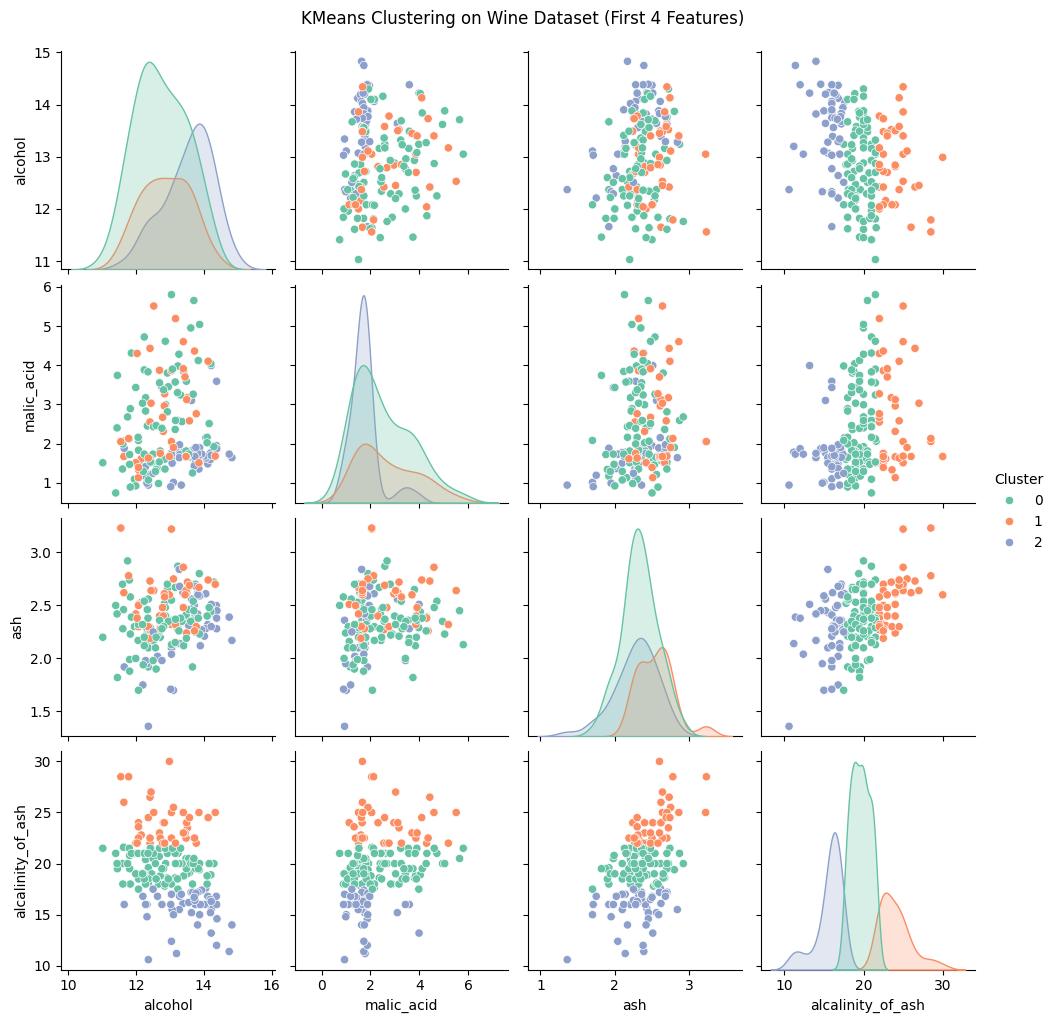

In [26]:
#46
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine

# Load and preprocess
wine = load_wine()
X = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
X['Cluster'] = labels

# Pairplot
sns.pairplot(X, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


Clusters found: 3
Noise points: 16


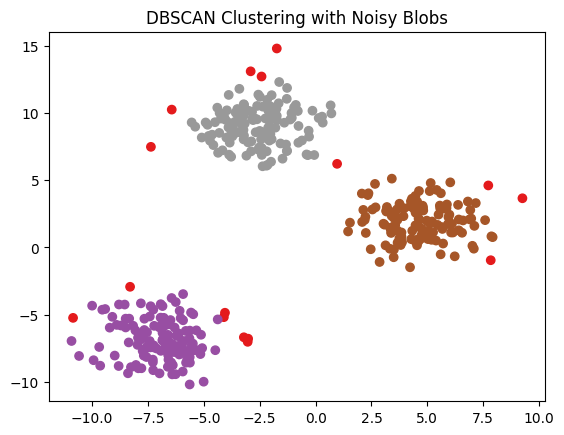

In [27]:
#47
# Generate noisy blobs
X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.5, random_state=42)

# Apply DBSCAN
db = DBSCAN(eps=1.2, min_samples=5)
labels = db.fit_predict(X)

# Count clusters and noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Clusters found: {n_clusters}")
print(f"Noise points: {n_noise}")

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')
plt.title("DBSCAN Clustering with Noisy Blobs")
plt.show()


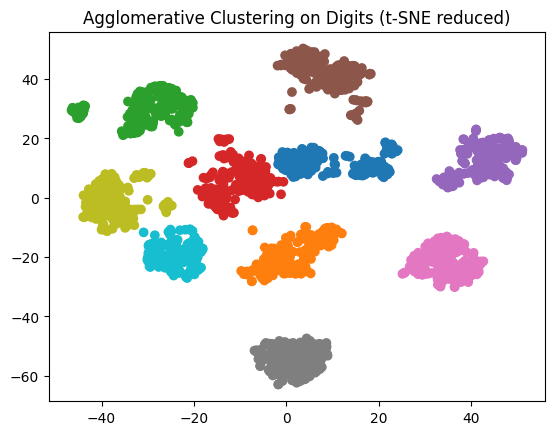

In [28]:
#48
# Load and reduce dimensions
digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

# Plot clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("Agglomerative Clustering on Digits (t-SNE reduced)")
plt.show()
